# Modeling: classification problem

***Can we predict the default status of customers given their demographical and payment history?*** 

 
 ***Random Forest***
 Accuracy 0.806433659839715; 
 Kappa 0.31882442357752183; 
 Sensitivity 0.3254982115482882; 
 Specificity 0.9403728475878753; 
 Precision 0.603219696969697; 
 False Positive Rate 0.059627152412124663


 ***Support Vector Machine***
 Accuracy 0.7836153161175423; 
 Kappa 0.022706581138107862; 
 Sensitivity 0.01788451711803781; 
 Specificity 0.9968692187277644; 
 Precision 0.6140350877192983; 
 False Positive Rate 0.0031307812722356624
 

 ***K-Nearest Neighbors***
 Accuracy 0.7792742653606411; 
 Kappa 0.07280833765478378; 
 Sensitivity 0.07562595809913132; 
 Specificity 0.9752383663014088; 
 Precision 0.45962732919254656; 
 False Positive Rate 0.02476163369859115
 

 ***Logistic Regression***
 Accuracy 0.7821682991985752; 
 Kappa 0.0005764039984930136; 
 Sensitivity 0.000510986203372509; 
 Specificity 0.9998576917603529; 
 Precision 0.5; 
 False Positive Rate 0.00014230823964707557

In [1]:
# import: numpy, pandas, scipy, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# estimators
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model metrics
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skm


# cross validation
from sklearn.cross_validation import train_test_split


# parameter tuning
from sklearn.grid_search import GridSearchCV

C:\Users\ezlip\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ezlip\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# import the dataset 

credit = pd.read_csv('Preprocessedcreditdata.csv', header = 0)

pd.set_option('display.max_columns', 25) 
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,status_Aug,status_Sep,bill_Apr,bill_May,bill_Jun,bill_Jul,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay
0,20000,2,2,1,24,1,0,0,0,0,2,2,0,0,0,689,3102,3913,0,0,0,0,689,0,1
1,120000,2,2,2,26,1,2,0,0,0,2,0,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000,0,1
2,90000,2,2,2,34,2,0,0,0,0,0,0,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
3,50000,2,2,1,37,2,0,0,0,0,0,0,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
4,50000,1,2,1,57,4,0,0,0,0,0,0,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681,2000,0


In [3]:
credit.shape

(29946, 25)

In [4]:
credit.sample(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,status_Aug,status_Sep,bill_Apr,bill_May,bill_Jun,bill_Jul,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay
27207,250000,1,3,1,28,1,0,0,0,0,0,0,95309,93354,92278,90497,191305,249827,3525,3301,3186,3913,3899,8500,0
12649,60000,2,1,2,26,1,0,0,0,0,0,1,43550,44307,43296,28266,23040,0,15000,1549,1669,20000,8000,23040,0
11275,120000,2,1,2,33,2,0,0,0,0,0,2,22845,22214,21560,20908,19844,18653,2000,1000,1000,1000,1400,1500,1
14384,50000,2,1,2,23,1,0,0,0,0,0,0,39115,37744,36991,36120,35409,33959,5000,2000,1500,1472,1601,2000,0
26515,50000,2,3,2,56,4,0,0,0,0,0,0,16194,15417,48371,50417,49157,48155,20698,1017,600,1683,2058,1798,0
10923,500000,1,1,1,42,3,0,0,0,0,0,1,7867,1349,8974,32269,11652,3747,0,7867,1349,8981,34545,11684,0
19917,300000,2,3,1,37,2,0,0,0,0,0,0,9234,54744,69725,84870,84922,85405,126463,1594,1095,2210,3319,3479,0
6314,50000,1,3,1,51,4,0,0,0,0,0,0,6878,6379,4843,3287,2228,636,3000,1000,2000,2000,1500,4600,0
29320,260000,1,2,2,28,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9360,450000,2,1,1,69,5,0,0,0,0,0,0,2374,6265,0,1173,0,2000,708,2374,6265,0,1173,0,1


In [5]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,status_Aug,status_Sep,bill_Apr,bill_May,bill_Jun,bill_Jul,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay
count,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,2.994600e+04,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,2.994600e+04,29946.000000,29946.000000
mean,167546.573165,1.603486,1.840646,1.554665,35.481300,1.996026,0.226474,0.221465,0.258632,0.303814,0.319943,0.356742,38911.533393,40352.140252,43306.688005,4.706321e+04,49224.542744,51278.911841,5220.871035,4804.211080,4829.614573,5227.841314,5.926824e+03,5659.736826,0.221432
std,129807.831678,0.489182,0.743774,0.518259,9.218413,0.965536,0.715407,0.717765,0.761134,0.790364,0.801602,0.760389,59592.166712,60836.076370,64374.889734,6.939321e+04,71219.298988,73682.871378,17791.413753,15290.655486,15677.788192,17618.433069,2.306022e+04,16552.642231,0.415218
min,10000.000000,1.000000,1.000000,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1261.000000,1770.250000,2335.000000,2.684500e+03,2988.250000,3570.250000,122.000000,255.250000,298.000000,390.000000,8.360000e+02,1000.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17098.500000,18121.000000,19066.000000,2.010800e+04,21221.000000,22400.000000,1500.000000,1500.000000,1500.000000,1800.000000,2.010000e+03,2100.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49248.500000,50244.750000,54601.750000,6.024075e+04,64108.000000,67263.000000,4000.000000,4040.750000,4015.000000,4511.500000,5.000000e+03,5007.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,6.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000,621000.000000,896040.000000,1.684259e+06,873552.000000,1.000000


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 25 columns):
LIMIT_BAL       29946 non-null int64
SEX             29946 non-null int64
EDUCATION       29946 non-null int64
MARRIAGE        29946 non-null int64
AGE             29946 non-null int64
AGE_bin         29946 non-null int64
status_Apr      29946 non-null int64
status_May      29946 non-null int64
status_Jun      29946 non-null int64
status_Jul      29946 non-null int64
status_Aug      29946 non-null int64
status_Sep      29946 non-null int64
bill_Apr        29946 non-null int64
bill_May        29946 non-null int64
bill_Jun        29946 non-null int64
bill_Jul        29946 non-null int64
bill_Aug        29946 non-null int64
bill_Sep        29946 non-null int64
prev_pay_Apr    29946 non-null int64
prev_pay_May    29946 non-null int64
prev_pay_Jun    29946 non-null int64
prev_pay_Jul    29946 non-null int64
prev_pay_Aug    29946 non-null int64
prev_pay_Sep    29946 non-null int64
def

## Correlation Matrix

In [7]:
corrMat = credit.corr()
print(corrMat)

              LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE   AGE_bin  \
LIMIT_BAL      1.000000  0.024898  -0.230733 -0.110498  0.144850  0.120587   
SEX            0.024898  1.000000   0.013110 -0.030152 -0.091139 -0.083089   
EDUCATION     -0.230733  0.013110   1.000000 -0.144084  0.182279  0.184054   
MARRIAGE      -0.110498 -0.030152  -0.144084  1.000000 -0.416497 -0.399414   
AGE            0.144850 -0.091139   0.182279 -0.416497  1.000000  0.957200   
AGE_bin        0.120587 -0.083089   0.184054 -0.399414  0.957200  1.000000   
status_Apr    -0.167632 -0.032047   0.028602  0.002455 -0.017212 -0.013007   
status_May    -0.169923 -0.038455   0.039461 -0.002652 -0.013440 -0.010680   
status_Jun    -0.180456 -0.039912   0.050860 -0.003546 -0.007180 -0.004463   
status_Jul    -0.190959 -0.041331   0.052479  0.001684 -0.014135 -0.009402   
status_Aug    -0.196945 -0.044625   0.062608 -0.009666 -0.008719 -0.003578   
status_Sep    -0.170598 -0.034299   0.055822 -0.011735 -0.001166

In [8]:
# AGE removed, AGE_bin left 

del credit['AGE']

In [9]:
# highly correlated variables removed

del credit['bill_May']
del credit['bill_Aug']
del credit['bill_Jun']

In [10]:
# check correlations

corrMat = credit.corr()
print(corrMat)

              LIMIT_BAL       SEX  EDUCATION  MARRIAGE   AGE_bin  status_Apr  \
LIMIT_BAL      1.000000  0.024898  -0.230733 -0.110498  0.120587   -0.167632   
SEX            0.024898  1.000000   0.013110 -0.030152 -0.083089   -0.032047   
EDUCATION     -0.230733  0.013110   1.000000 -0.144084  0.184054    0.028602   
MARRIAGE      -0.110498 -0.030152  -0.144084  1.000000 -0.399414    0.002455   
AGE_bin        0.120587 -0.083089   0.184054 -0.399414  1.000000   -0.013007   
status_Apr    -0.167632 -0.032047   0.028602  0.002455 -0.013007    1.000000   
status_May    -0.169923 -0.038455   0.039461 -0.002652 -0.010680    0.740024   
status_Jun    -0.180456 -0.039912   0.050860 -0.003546 -0.004463    0.602917   
status_Jul    -0.190959 -0.041331   0.052479  0.001684 -0.009402    0.492772   
status_Aug    -0.196945 -0.044625   0.062608 -0.009666 -0.003578    0.406354   
status_Sep    -0.170598 -0.034299   0.055822 -0.011735  0.003432    0.373155   
bill_Apr       0.290417 -0.016624  -0.01

## Features selection

In [11]:
# select the features: without default_pay 

features = credit.iloc[:, :-1]
print('Selection of feature sample')
features.info()

Selection of feature sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 20 columns):
LIMIT_BAL       29946 non-null int64
SEX             29946 non-null int64
EDUCATION       29946 non-null int64
MARRIAGE        29946 non-null int64
AGE_bin         29946 non-null int64
status_Apr      29946 non-null int64
status_May      29946 non-null int64
status_Jun      29946 non-null int64
status_Jul      29946 non-null int64
status_Aug      29946 non-null int64
status_Sep      29946 non-null int64
bill_Apr        29946 non-null int64
bill_Jul        29946 non-null int64
bill_Sep        29946 non-null int64
prev_pay_Apr    29946 non-null int64
prev_pay_May    29946 non-null int64
prev_pay_Jun    29946 non-null int64
prev_pay_Jul    29946 non-null int64
prev_pay_Aug    29946 non-null int64
prev_pay_Sep    29946 non-null int64
dtypes: int64(20)
memory usage: 4.6 MB


In [12]:
# select the dependent variable: default_pay (repayment status)

depVar = credit['default_pay']
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: default_pay, dtype: int64

In [13]:
credit.default_pay.value_counts()

0    23315
1     6631
Name: default_pay, dtype: int64

In [14]:
print(features.shape, depVar.shape)

(29946, 20) (29946,)


## Train / Test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.30, random_state = 15)

In [16]:
print (X_train.shape, X_test.shape)

(20962, 20) (8984, 20)


In [17]:
print(y_train.shape, y_test.shape)

(20962,) (8984,)


## Preprocessing 

In [18]:
#X_scaled = preprocessing.scale(X_train)

## Modeling

#### Models

In [19]:
modelKNN = KNeighborsClassifier()   
modelSVM = svm.SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()

### Logistic Regression Model

#### Train / Test split

In [20]:
# train a logistic regression model on the training set

LR = modelLR.fit(X_train, y_train)

In [21]:
# class prediction for the testing set

LR_pred = modelLR.predict(X_test)

In [22]:
# classification accuracy: percentage of correct predictions

print(skm.accuracy_score(y_test, LR_pred))

0.7821682991985752


In [23]:
# compering with null accuracy
# null accuracy - accuracy that could be achieved by always predicting the most frequent class

# examin the class distribution of the testing set

y_test.value_counts()

0    7027
1    1957
Name: default_pay, dtype: int64

In [24]:
# calculate the percentage of "1s"

y_test.mean()

0.21783170080142475

In [25]:
# calculate the percentage of "0s"

1 - y_test.mean()

0.7821682991985752

In [26]:
# calculate null accuracy (for binary classification problems coded as 1/0)

max(y_test.mean(), 1- y_test.mean())

0.7821682991985752

Interpretation: dumb model that always predicts 0 would be right 78 % of the time, so
classification accuracy is not that good as it's doesn't differ from a dumb model.


Why accuracy is not the best metric?

Because it doesn't tell about underlaying distribution of values and what the errors are, for example:

In [27]:
# print the first 35 true and predicted responses
# pattern: 0s are well predicted, but not 1s - it's obvious that certain type of mistake exists 

print('True:', y_test.values[0:35])
print('Pred:', LR_pred[0:35])

True: [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Solution: 

Confusion matrix will reveal the pattern, as it describes the performance of a classification model.

Gives a more complete picture of how a classifier is performing

In [28]:
confusion_LR = skm.confusion_matrix(y_test, LR_pred)
print(confusion_LR)

# 0: negative class (doesn't have default status)
# 1: positive class (has default status)


#        Pr_0  Pr_1
# Act_0   TN    FP 
# Act_1   FN    TP

[[7026    1]
 [1956    1]]


Completely wrong prediction regarding positive classes (1s) - default status. 

Negative class (0s) - correct prediction

Interpretation:

1 person: having default status was correctly predicted (TP: True Positives)


7026 persons: not having defaul status were correctly predicted (TN: True Negative)  


1 person: was incorrectly predicted as having default status, but in fact doesn't have (FP: False Positive, Type I error)


1956 persons: were incorrectly predicted as not having default status, but in fact they do (FN: False Negative, Type II error)

#### Metrics 

**Classification accuracy:** overall, how often is the classifier correct?  

In [29]:
print(skm.accuracy_score(y_test, LR_pred))

0.7821682991985752


**Classification error:** overall, how often is the classifier incorrect? (Misclasification Rate)

In [30]:
print(1 - skm.accuracy_score(y_test, LR_pred))

0.21783170080142478


**Sensitivity:** when the actual value is positive, how often is the prediction correct?

How "sensitive" is the classifier to detecting positive instances? ("Recall" or "True Positive Rate")

In [31]:
print(skm.recall_score(y_test, LR_pred))

0.000510986203372509


**Specificity:** when the actual value is negative, how often is the prediction correct?

This classifier is highly specific but not highly sensitive, in fact is not sensitive at all

In [35]:
TN_LR = confusion_LR[0, 0]
FP_LR = confusion_LR[0, 1]

print(TN_LR / float(FP_LR + TN_LR))

0.9998576917603529


Interpretation: the Linear Regression model is highly specific but not sensitive

**False positive rate:** when the actual value is negative, how often is the prediction correct?

In [36]:
print(FP_LR / float(TN_LR + FP_LR))

0.00014230823964707557


**Precision:** when a positive value is predicted, how often is the prediction correct?

In [37]:
print(skm.precision_score(y_test, LR_pred))

0.5


Summary

In [38]:
print(" ***Logistic Regression***" ,'\n',"Accuracy",skm.accuracy_score(y_test, LR_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, LR_pred),'\n',"Sensitivity",skm.recall_score(y_test, LR_pred),'\n','Specificity',TN_LR/float(FP_LR + TN_LR),'\n',"Precision",skm.precision_score(y_test, LR_pred),'\n',"False Positive Rate",FP_LR/float(TN_LR + FP_LR))

 ***Logistic Regression*** 
 Accuracy 0.7821682991985752 
 Kappa 0.0005764039984930136 
 Sensitivity 0.000510986203372509 
 Specificity 0.9998576917603529 
 Precision 0.5 
 False Positive Rate 0.00014230823964707557


In [39]:
# Addional metrics

print(cross_val_score(modelLR, X_train, y_train)) 

modelLR.score(X_train, y_train)

[0.77647396 0.77701446 0.77672821]


0.7768342715389753

#### 10-fold Cross-Validation

In [40]:
LR_cv = cross_val_score(modelLR, features, depVar, cv = 10, scoring = 'accuracy').mean()

In [41]:
print("Accuracy of Linear Regression is: " , LR_cv)

Accuracy of Linear Regression is:  0.7785013048550337


### Support Vector Machine

In [42]:
SVM = modelSVM.fit(X_train, y_train)

In [43]:
SVM_pred = SVM.predict(X_test)

In [46]:
confusion_SVM = skm.confusion_matrix(y_test, SVM_pred)
print(confusion_SVM)

[[7005   22]
 [1922   35]]


In [47]:
TN_SVM = confusion_SVM[0, 0]
FP_SVM = confusion_SVM[0, 1]

In [48]:
print(" ***Support Vector Machine***" ,'\n',"Accuracy",skm.accuracy_score(y_test, SVM_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, SVM_pred),'\n',"Sensitivity",skm.recall_score(y_test, SVM_pred),'\n','Specificity',TN_SVM/float(FP_SVM + TN_SVM),'\n',"Precision",skm.precision_score(y_test, SVM_pred),'\n',"False Positive Rate",FP_SVM/float(TN_SVM + FP_SVM))

 ***Support Vector Machine*** 
 Accuracy 0.7836153161175423 
 Kappa 0.022706581138107862 
 Sensitivity 0.01788451711803781 
 Specificity 0.9968692187277644 
 Precision 0.6140350877192983 
 False Positive Rate 0.0031307812722356624


In [49]:
print(cross_val_score(SVM, X_train, y_train)) 

modelSVM.score(X_train, y_train)

[0.77647396 0.7773007  0.77959067]


0.9907928632764049

### K-Nearest Neighbors TUNED

#### 10-fold Cross-Validation

In [50]:
modelKNN = KNeighborsClassifier()
KNN_cv = cross_val_score(modelKNN, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(KNN_cv)

0.7522650265612137


In [51]:
# check the parameters

modelKNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Parameter tuning: GridSearchCV

In [55]:
# define the parameter values that should be searched

k_range = np.arange(1, 31)
weight_options = ['uniform', 'distance']

In [56]:
# create a parameter grid: map the parameter names to the names that should be searched

param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'weights': ['uniform', 'distance']}


In [58]:
# instantiate the grid 

grid_KNN = GridSearchCV(modelKNN, param_grid, cv = 10, scoring = 'accuracy')

In [59]:
grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [60]:
grid_KNN.grid_scores_

[mean: 0.69249, std: 0.01136, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.69249, std: 0.01136, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.76343, std: 0.00381, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.69349, std: 0.01131, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.73834, std: 0.00667, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.73590, std: 0.00636, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.76763, std: 0.00322, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.73729, std: 0.00649, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.75227, std: 0.00461, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.75050, std: 0.00331, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.76858, std: 0.00401, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.75246, std: 0.00532, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.76042, std: 0.00437, para

In [62]:
# best model

print(grid_KNN.best_score_)
print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)

0.7798874153229653
{'n_neighbors': 30, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')


In [63]:
# there is one tuple for each trial of CV
# examine the first tuple 

print(grid_KNN.grid_scores_[0].parameters)
print(grid_KNN.grid_scores_[0].cv_validation_scores)
print(grid_KNN.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1, 'weights': 'uniform'}
[0.67143538 0.67858846 0.69957082 0.68764902 0.69274809 0.70992366
 0.6894084  0.70324427 0.68830549 0.70405728]
0.6924911745062494


Text(0,0.5,'Cross-Validated Accuracy')

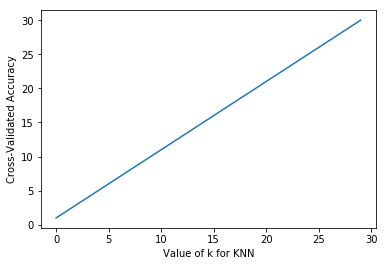

In [64]:
# plot the results 

plt.plot(k_range, )
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Train / Test split

In [65]:
modelKNN_par = KNeighborsClassifier(n_neighbors = 30, weights='uniform')  
KNN = modelKNN_par.fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [66]:
KNN_pred = KNN.predict(X_test)

In [67]:
confusion_KNN = skm.confusion_matrix(y_test, KNN_pred)
print(confusion_KNN)

[[6853  174]
 [1809  148]]


In [68]:
TN_KNN = confusion_KNN[0, 0]
FP_KNN = confusion_KNN[0, 1]

In [69]:
print(" ***K-Nearest Neighbors***" ,'\n',"Accuracy",skm.accuracy_score(y_test, KNN_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, KNN_pred),'\n',"Sensitivity",skm.recall_score(y_test, KNN_pred),'\n','Specificity',TN_KNN/float(FP_KNN + TN_KNN),'\n',"Precision",skm.precision_score(y_test, KNN_pred),'\n',"False Positive Rate",FP_KNN/float(TN_KNN + FP_KNN))

 ***K-Nearest Neighbors*** 
 Accuracy 0.7792742653606411 
 Kappa 0.07280833765478378 
 Sensitivity 0.07562595809913132 
 Specificity 0.9752383663014088 
 Precision 0.45962732919254656 
 False Positive Rate 0.02476163369859115


### Random Forest

In [70]:
RF = modelRF.fit(X_train, y_train, )
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
RF_pred = RF.predict(X_test)

In [72]:
confusion_RF = skm.confusion_matrix(y_test, RF_pred)
print(confusion_RF)

[[6598  429]
 [1332  625]]


In [73]:
TN_RF = confusion_RF[0, 0]
FP_RF = confusion_RF[0, 1]

In [74]:
print(" ***Random Forest***" ,'\n',"Accuracy",skm.accuracy_score(y_test, RF_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, RF_pred),'\n',"Sensitivity",skm.recall_score(y_test, RF_pred),'\n','Specificity',TN_RF/float(FP_RF + TN_RF),'\n',"Precision",skm.precision_score(y_test, RF_pred),'\n',"False Positive Rate",FP_RF/float(TN_RF + FP_RF))

 ***Random Forest*** 
 Accuracy 0.8039848619768477 
 Kappa 0.3099018087656923 
 Sensitivity 0.31936637710781807 
 Specificity 0.9389497651914046 
 Precision 0.5929791271347249 
 False Positive Rate 0.061050234808595415


In [75]:
print(cross_val_score(RF, X_train, y_train))
RF.score(X_train, y_train)

[0.8082427  0.80263346 0.80606841]


0.9782940559106955

In [76]:
# Feature importance

print(RF.feature_importances_)

[0.0763283  0.01748965 0.0268773  0.01861718 0.03261183 0.01888416
 0.03344646 0.02602656 0.01458757 0.02981336 0.09131633 0.07400728
 0.07476187 0.08777758 0.05961094 0.05725406 0.0598442  0.06284991
 0.06890157 0.06899389]


In [77]:
modelRF.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}